<a href="https://colab.research.google.com/github/lucaspinheiro27/Python_statistics/blob/main/Saude_mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_excel('/content/Saude_Mental.xlsx')
df.head()

,Data,Humor Geral,Qualidade de sono,Atividade Física,Interação Social,Sentimento predominanete,Quantidade de horas de sono,Alimentação,Relexões e comentários,Cansaço
0,2024-10-03,7,8,Sim,Moderada,Ansiedade,9,Moderada,"Dormi bem, mas estou ansioso",Não
1,2024-10-04,6,8,Sim,Muita,Depressão,7,Moderada,Estou me sentindo triste,Não
2,2024-10-05,7,6,Não,Muita,Depressão,5,Moderada,Me sentindo solitário,Sim
3,2024-10-06,6,7,Não,Moderada,Ansiedade,10,Moderada,Ansiedade social,Sim
4,2024-10-07,5,3,Sim,Moderada,Depressão,4,Ruim,Me sentindo cansado,Sim


In [32]:
df.rename(columns = {'Atividade Física ':'Atividade Fisica'}, inplace = True)
print(df.columns)

Index(['Data', 'Humor Geral', 'Qualidade de sono', 'Atividade Fisica',
       'Interação Social', 'Sentimento predominanete',
       'Quantidade de horas de sono', 'Alimentação', 'Relexões e comentários',
       'Cansaço'],
      dtype='object')


$$
\text{Relative Frequency} = \frac{f}{n}
$$

In [33]:
frequency_table = df['Atividade Fisica'].value_counts()
frequency_table['Total'] = frequency_table.sum()
frequency_table

,count
Atividade Fisica,
Sim,15
Não,6
Total,21


In [34]:
percentage = (frequency_table / frequency_table['Total']) * 100
percentage

,count
Atividade Fisica,
Sim,71.428571
Não,28.571429
Total,100.000000


In [35]:
difference = frequency_table['Sim'] - frequency_table['Não']
proportion = difference / frequency_table['Total']
print(f"A diferença do número de dias que houve atividade fisica é {difference} dias e a proporção do que isso representa é de {proportion:.2f}")

A diferença do número de dias que houve atividade fisica é 9 dias e a proporção do que isso representa é de 0.43


In [36]:
frequency_sentimento = df['Sentimento predominanete'].value_counts()
freq_total = frequency_sentimento.sum()
print(f"Frequência total de dias:{freq_total}")

Frequência total de dias:21


In [37]:
percentage_sentimento = pd.DataFrame(index=frequency_sentimento.index)
percentage_sentimento['Porcentagem'] = (frequency_sentimento / freq_total) * 100
frequency_sentimento = pd.concat([frequency_sentimento, percentage_sentimento], axis=1)

frequency_sentimento['Diferença da Porcentagem Total'] = frequency_sentimento['Porcentagem'] - percentage_sentimento['Porcentagem'].sum()

frequency_sentimento

,count,Porcentagem,Diferença da Porcentagem Total
Sentimento predominanete,,,
Alegria,9,42.857143,-57.142857
Depressão,7,33.333333,-66.666667
Ansiedade,5,23.809524,-76.190476


The sample mean formula:
$$
\bar{X} = \frac{\sum X}{N}
$$

In [38]:
print("mean of mood : ", np.mean(df['Humor Geral']))

mean of mood :  6.809523809523809


In [39]:
print("mean of sleep quality: ", np.mean(df['Qualidade de sono']))

mean of sleep quality:  7.0


In [40]:
print("mean of the quantity of sleep hours: ", np.mean(df['Quantidade de horas de sono']))

mean of the quantity of sleep hours:  6.9523809523809526


The median formula:
$$
\text{Median} = \frac{n + 1}{2}
$$

In [46]:
print('median of mood:', np.median(df['Humor Geral']))

median of mood: 7.0


In [48]:
print('median of sleep quality: ', np.median(df['Qualidade de sono']))

median of sleep quality:  7.0


In [49]:
print('median of sleep hours:', np.median(df['Quantidade de horas de sono']))

median of sleep hours: 7.0


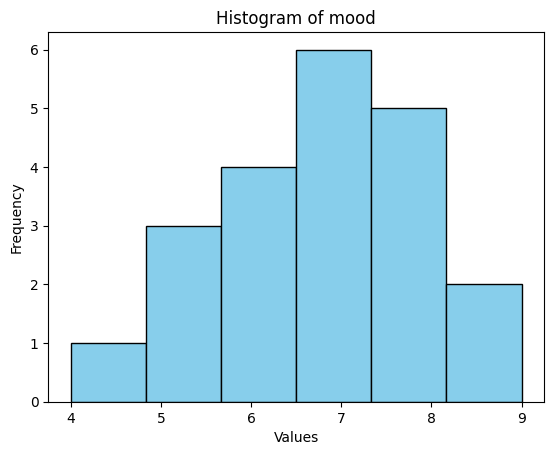

In [50]:
plt.hist(df['Humor Geral'], bins=6, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of mood')
plt.show()